In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
df=pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [78]:
df.rename(columns = {'normalized-losses':'normalised_losses', 'num-of-doors':'number_of_doors',
                    'wheel-base': 'wheel_base', 'engine-size':'engine_size', 'body_style':'body_style',
                    'drive-wheels':'drive_wheels', 'num-of-cylinders': 'num_of_cylinders', 
                    'fuel-system':'fuel_system', 'compression-ratio':'compression_ratio', 'peak-rpm':'peak_rpm',
                    'city-mpg':'city_mpg', 'highway-mpg': 'highway_mpg', 'curb-weight':'curb_weight'}, 
          inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalised_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   number_of_doors    199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [80]:
df.describe()

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Distribution of the data

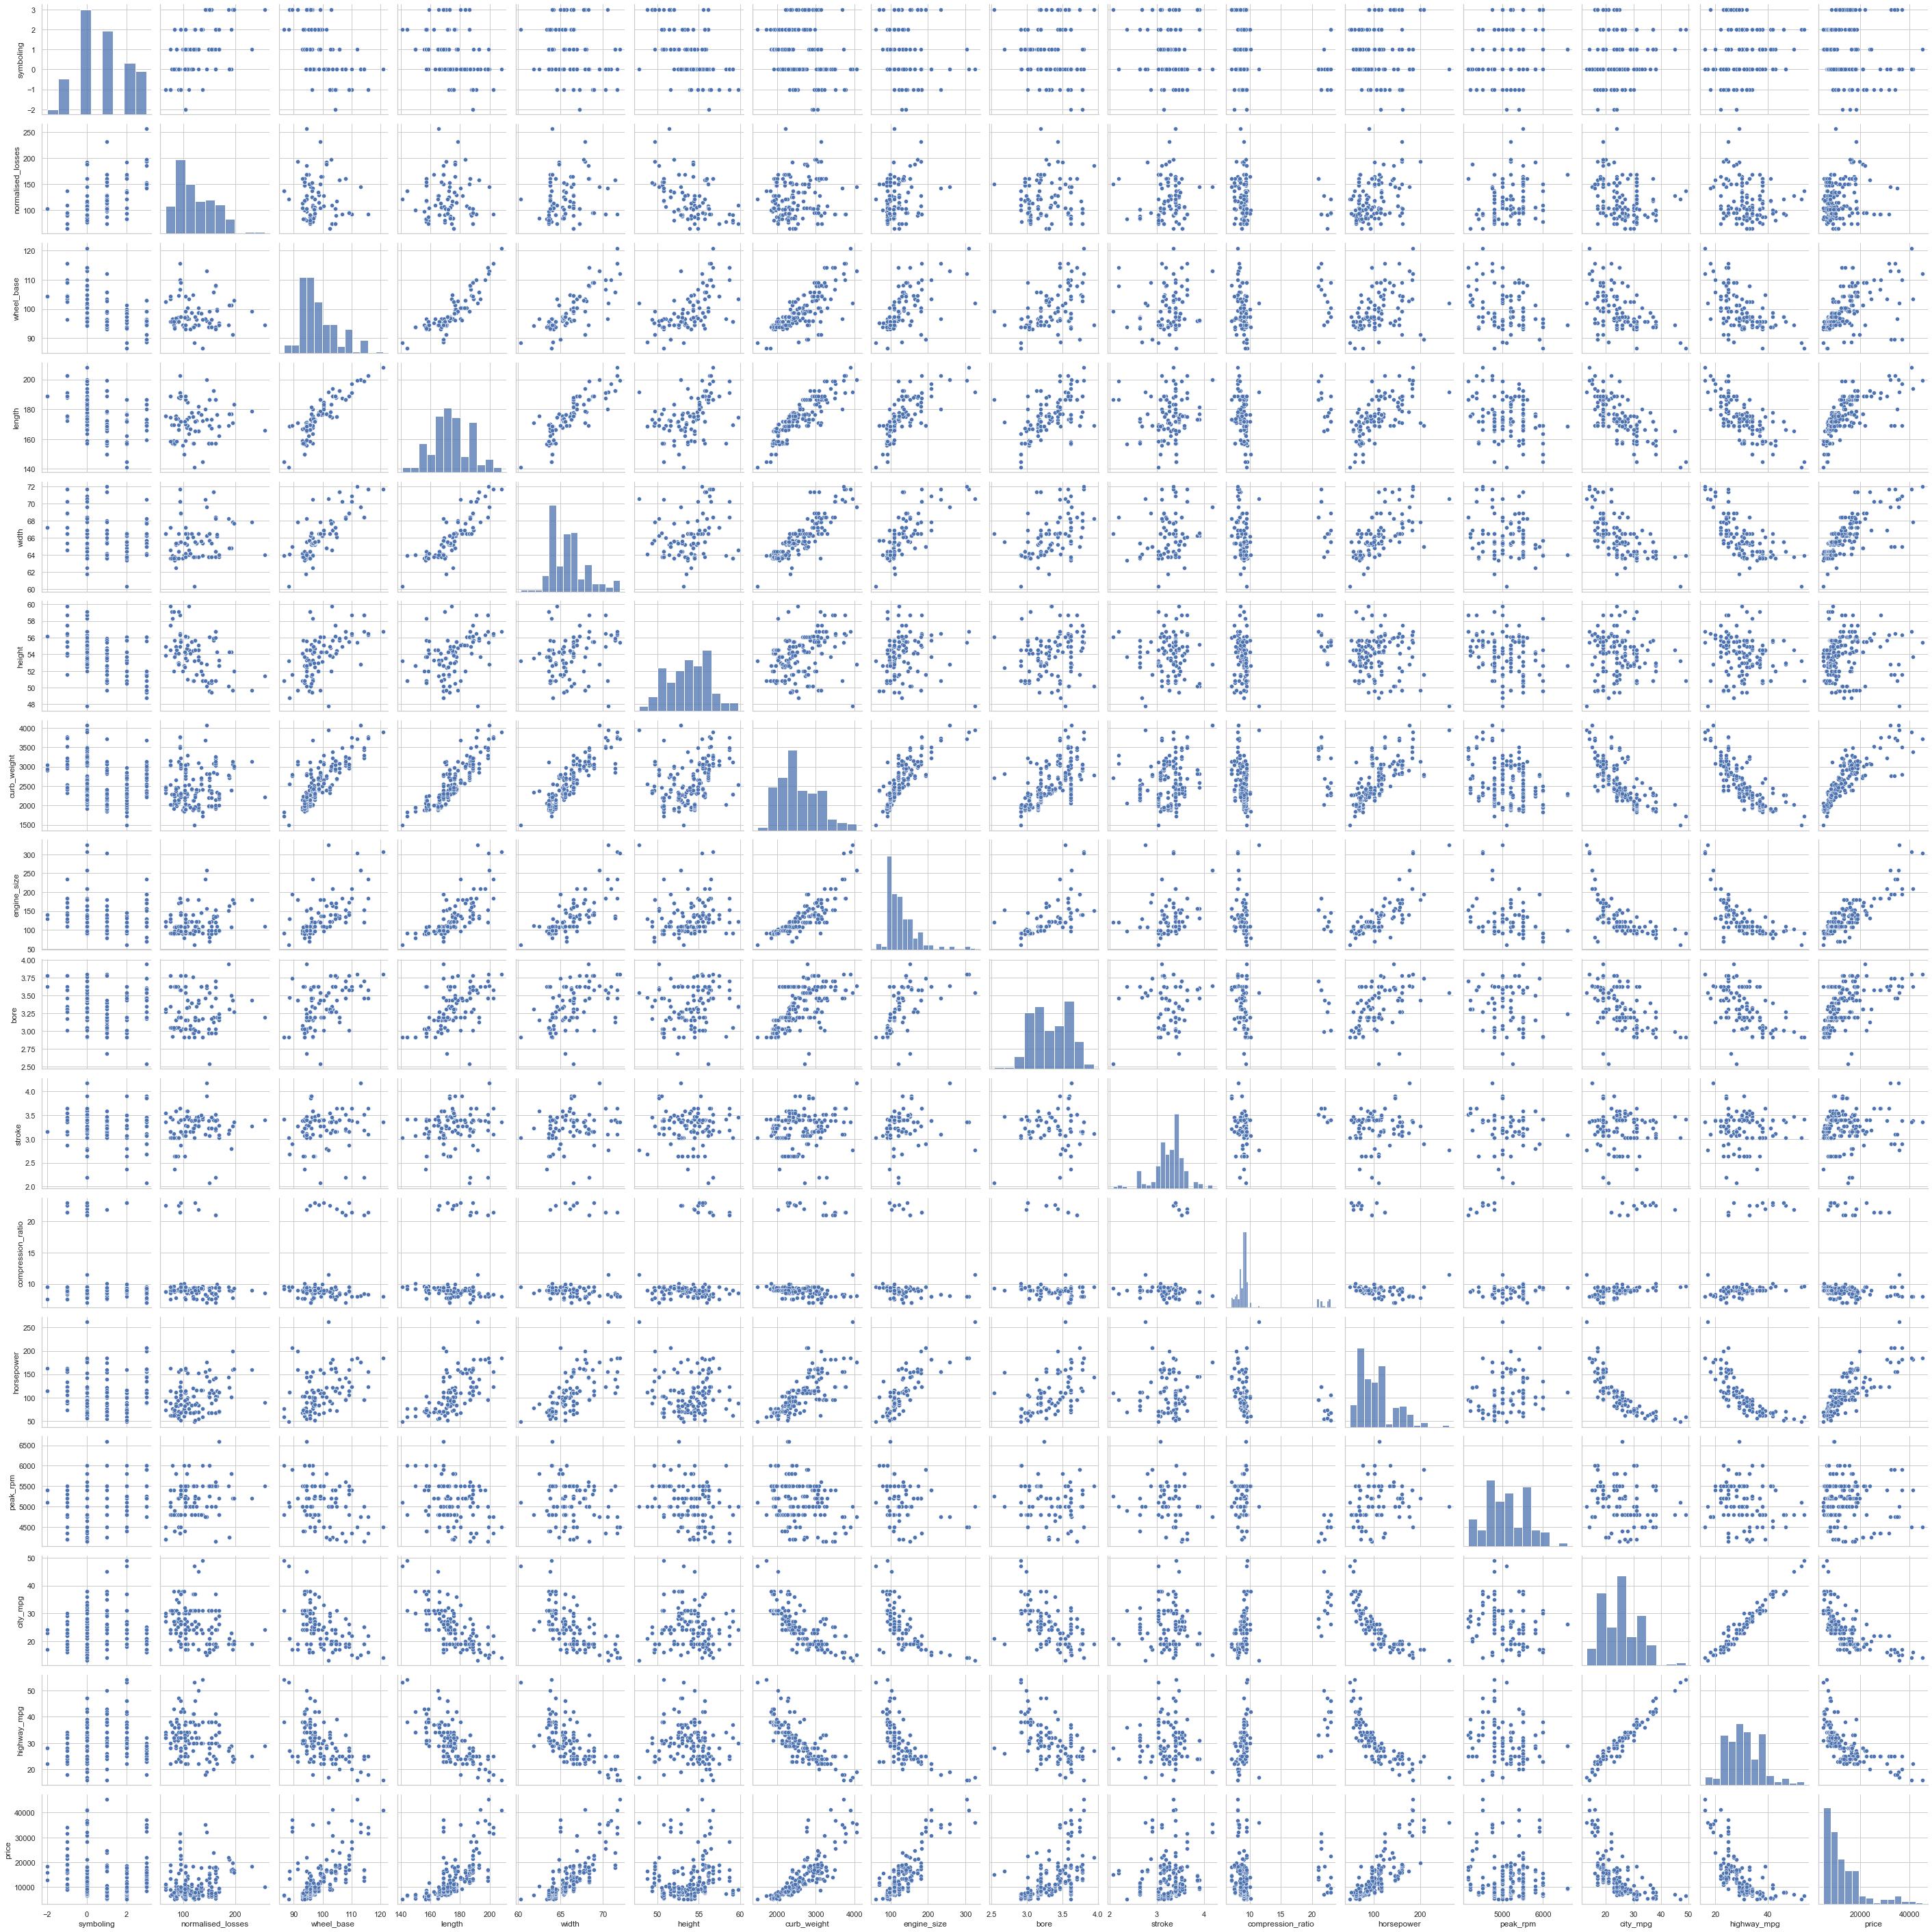

In [85]:
sns.pairplot(df)
plt.show()

### Duplicates

In [5]:
df.duplicated().sum()

0

### Null columns

In [6]:
#df.isnull().sum()
df[["bore","stroke", "peak_rpm","horsepower", "number_of_doors"]].head()

,bore,stroke,peak_rpm,horsepower,number_of_doors
0,3.47,2.68,5000.0,111.0,two
1,3.47,2.68,5000.0,111.0,two
2,2.68,3.47,5000.0,154.0,two
3,3.19,3.40,5500.0,102.0,four
4,3.19,3.40,5500.0,115.0,four


All of the columns that have null value have a numeric value except for the number of doors column

#### To overcome this for the categorical data (number of doors):

Text(0.5, 0, 'Number of Doors')

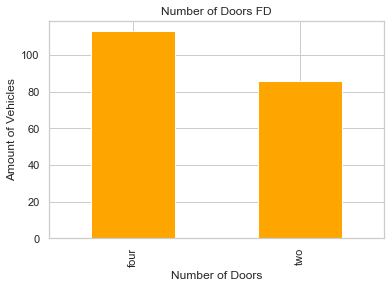

In [26]:
df['number_of_doors'].value_counts().plot(kind='bar',color='orange')

plt.title("Number of Doors FD")
plt.ylabel('Amount of Vehicles')
plt.xlabel('Number of Doors')

In [29]:
# Will use the mode due to there only being 2 options:

df['number_of_doors'].fillna(df['number_of_doors'].mode().iloc[0], inplace = True)

#### To overcome this for the numeric data will use the central tendency measure and determine whether there will be a value inputted or if the rows will be removed

##### Ascending order of outliers:
 - 0 outliers: 
     - Symboling: sns.boxplot(df.symboling, width = 0.5, color = "yellow")
     - Height: sns.boxplot(df.height, width = 0.5, color = "pink")
     - Bore: sns.boxplot(df.bore, width = 0.5, color = "blue")
 - 1 outlier:
     - Length: sns.boxplot(df.length, width = 0.5, color = "green")
     - Peak rpm: sns.boxplot(df.peak_rpm, width = 0.5, color = "red") 
     - Curb Weight: sns.boxplot(df.curb_weight, width = 0.5, color = "white")
     - Normalised Losses: sns.boxplot(df.normalised_losses, width = 0.5, color = "blue")
 - 2 outliers: 
     - Wheel base: sns.boxplot(df.wheel_base, width = 0.5, color = "purple")
     - City mpg: sns.boxplot(df.city_mpg, width = 0.5, color = "blue") 
 - 3 outliers:
     - Horsepower: sns.boxplot(df.horsepower, width = 0.5, color = "orange") 
     - Highway mpg: sns.boxplot(df.highway_mpg, width = 0.5, color = "green")
 - 6 outliers:
     - Engine size: sns.boxplot(df.engine_size, width = 0.5, color = "blue")
     - Stroke: sns.boxplot(df.stroke, width = 0.5, color = "red")
 - 7 outliers:
     - Width: sns.boxplot(df.width, width = 0.5, color = "orange")
 - 10 outliers:
     - Compression ratio: sns.boxplot(df.compression_ratio, color = "grey")

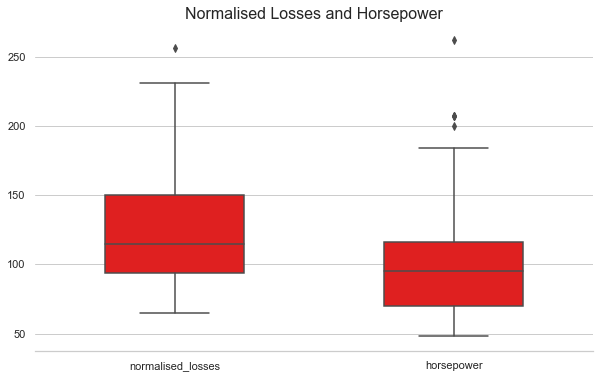

In [8]:
df = df[['normalised_losses','horsepower']]

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
c = 'red'

g = sns.boxplot(data=df, width=0.5, color = c)

        
plt.title("Normalised Losses and Horsepower", fontsize=16)
xvalues = ["bore","stroke"] 

sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)#therefore will use the median for this and have noticed a few outliers for stroke 



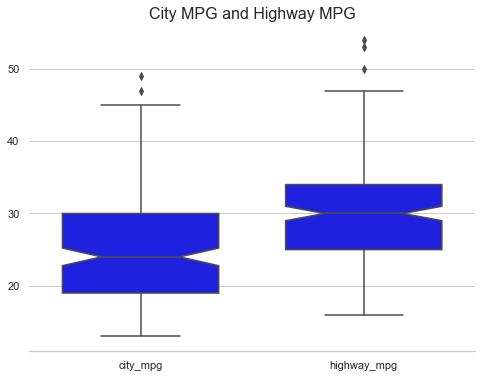

In [13]:
df_ordered = df[['city_mpg','highway_mpg']]

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))

g = sns.boxplot(data=df_ordered, notch = True, width=0.7, color = "blue")

plt.title("City MPG and Highway MPG", fontsize=16)
xvalues = ["bore","stroke"] 

sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

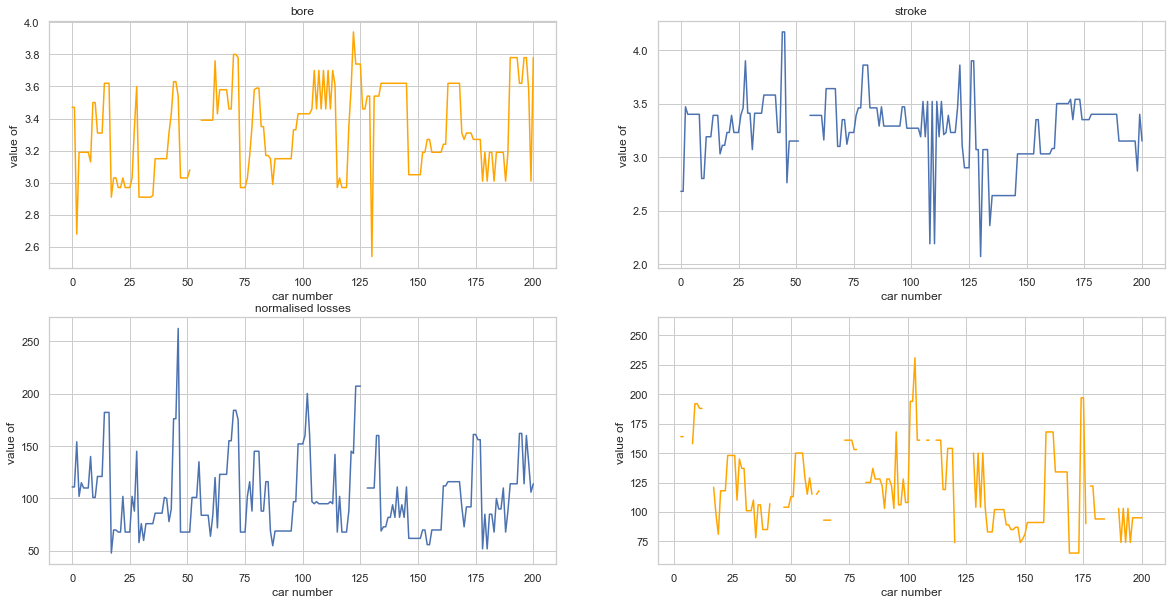

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
df['bore'].plot(color = 'orange', kind = 'line', ax=axes[0,0]); axes[0,0].set_title('bore')
df['stroke'].plot(ax=axes[0,1]); axes[0,1].set_title('stroke')
df['horsepower'].plot(ax=axes[1,0]); axes[1,0].set_title('power')
df['normalised_losses'].plot(color = 'orange', ax=axes[1,1]); axes[1,0].set_title('normalised losses')

for ax in axes.flat:
    ax.set(xlabel='car number', ylabel='value of ')

In [30]:
# for the purpose of retaining the data will use the median 
# but will see how the results differ when the outliers are removed in the latter parts of this notebook
df.fillna(df.median(), inplace = True)

In [31]:
df.isnull().sum()

symboling            0
normalised_losses    0
make                 0
fuel-type            0
aspiration           0
number_of_doors      0
body-style           0
drive_wheels         0
engine-location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine-type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Correlation study

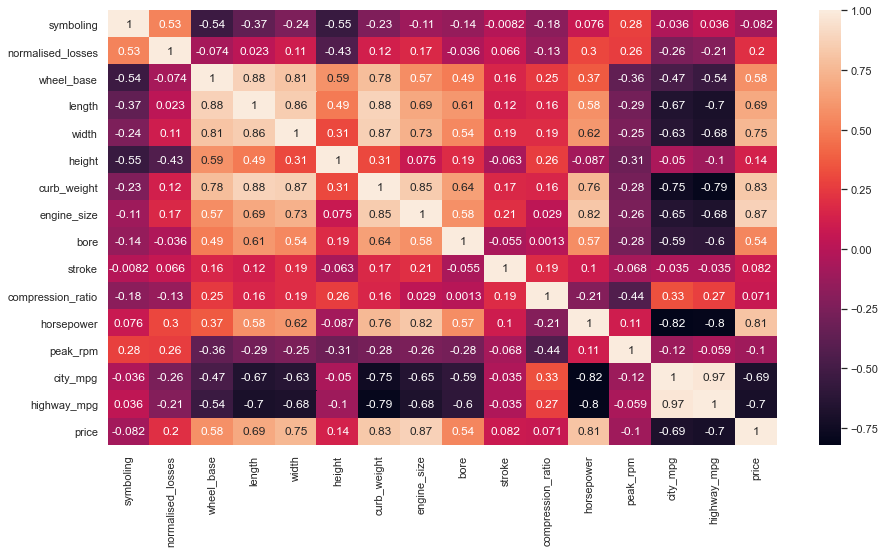

In [86]:
corr = df.corr()
plt.figure(figsize=(15,8))
a = sns.heatmap(corr, annot=True)

### The addition and removal of columns

In [65]:
#df['volume'] = df['length'] * df['width'] * df['height']

In [65]:
newdf=pd.read_csv("automobile.csv")
newdf.rename(columns = {'normalized-losses':'normalised_losses', 'num-of-doors':'number_of_doors',
                    'wheel-base': 'wheel_base', 'engine-size':'engine_size', 'body_style':'body_style',
                    'drive-wheels':'drive_wheels', 'num-of-cylinders': 'num_of_cylinders', 
                    'fuel-system':'fuel_system', 'compression-ratio':'compression_ratio', 'peak-rpm':'peak_rpm',
                    'city-mpg':'city_mpg', 'highway-mpg': 'highway_mpg', 'curb-weight':'curb_weight'}, 
          inplace = True)

newdf['number_of_doors'].fillna(df['number_of_doors'].mode().iloc[0], inplace = True)
newdf.fillna(df.median(), inplace = True)

In [68]:
idx = 0
new_col = newdf['length'] * newdf['width'] * newdf['height']
newdf.insert(loc=idx, column='volume', value=new_col)

In [69]:
newdf.head()

,volume,symboling,normalised_losses,make,fuel-type,aspiration,number_of_doors,body-style,drive_wheels,engine-location,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,528019.904,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,528019.904,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,587592.640,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,634816.956,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,636734.832,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [70]:
del newdf["length"]
del newdf['width']
del newdf['height']

In [71]:
newdf.describe()

,volume,symboling,normalised_losses,wheel_base,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,619579.968378,0.840796,120.711443,98.797015,2555.666667,126.875622,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,79564.106791,1.254802,32.111623,6.066366,517.296727,41.546834,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,452643.156000,-2.000000,65.000000,86.600000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,566490.600000,0.000000,101.000000,94.500000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,601385.700000,1.000000,115.000000,97.000000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,674493.768000,2.000000,137.000000,102.400000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,846007.659000,3.000000,256.000000,120.900000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


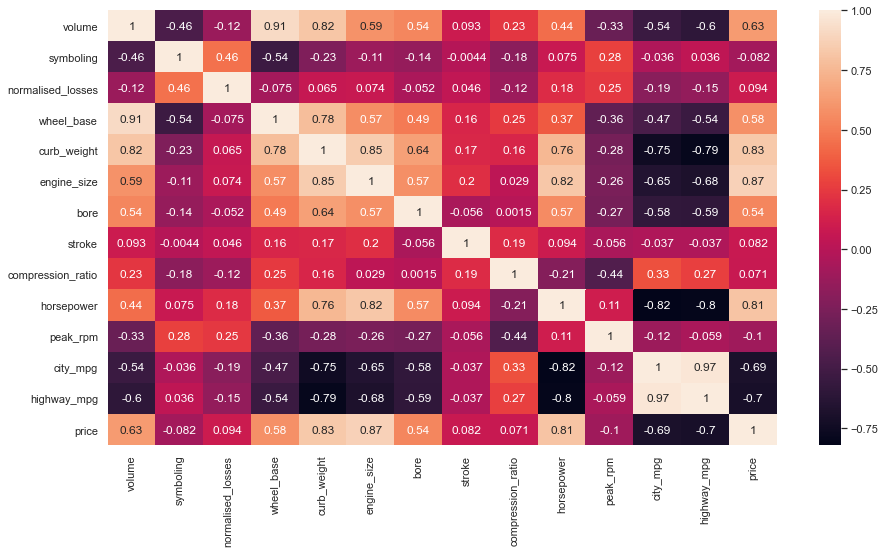

In [63]:
corr = newdf.corr()
plt.figure(figsize=(15,8))
a = sns.heatmap(corr, annot=True)

### Price Breakdown by make  

Text(0.5, 1.0, 'Bar Chart representing the Price of a Car by Make')

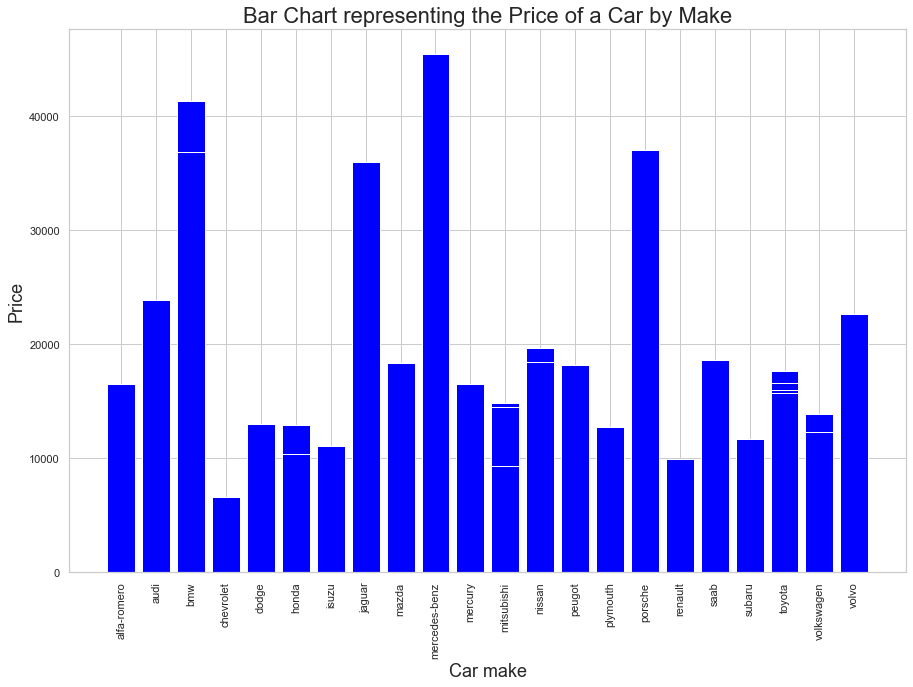

In [74]:
x = newdf['make']
y = newdf['price']
plt.figure(figsize=(15, 10))
plt.bar(x,y, color = 'blue')
plt.xticks(rotation=90)

plt.xlabel('Car make', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Bar Chart representing the Price of a Car by Make', fontsize = 22)

Text(0, 0.5, 'Price')

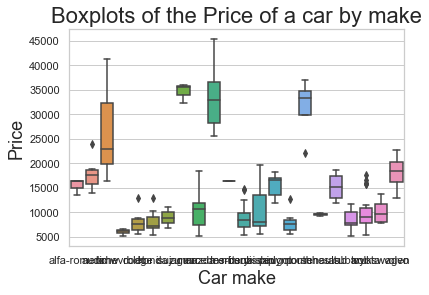

In [75]:
plt.title('Boxplots of the Price of a car by make', fontsize = 22)


plt.rcParams['figure.figsize']=(25,15)
ax = sns.boxplot(data = newdf, x="make", y="price")

plt.xlabel('Car make', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

### Remove Outliers

In [34]:
df=pd.read_csv("automobile.csv")

In [41]:
df_withoutOutliers = df.dropna()

In [42]:
df_withoutOutliers

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


The size of the dataframe has now reduced to 159 rows of data, resulting in 4,134 records of data

Text(0, 0.5, 'Price')

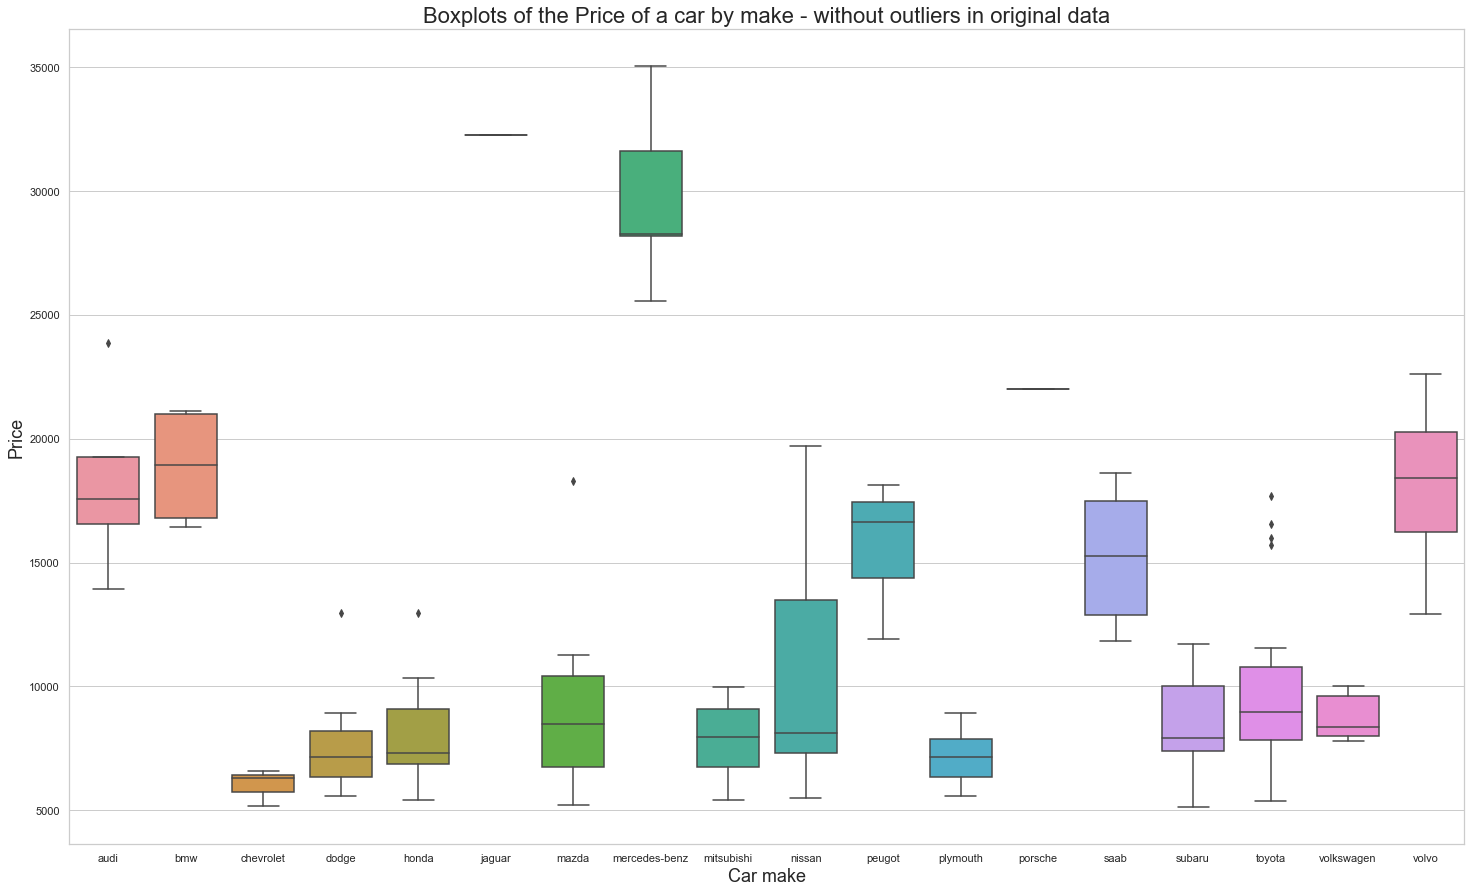

In [62]:
plt.title('Boxplots of the Price of a car by make - without outliers in original data', fontsize = 22)


plt.rcParams['figure.figsize']=(25,15)
ax = sns.boxplot(data = df_withoutOutliers, x="make", y="price")

plt.xlabel('Car make', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

Without the outliers the highest priced vehicle is still mercedes Benz, therefore I will use the original dataset where the the NaN values were replaced until the machine learning algorithms stage.